# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : NLP
## Topic   : Tweets Cleanup and Analysis Using Regular Expressions.

In [3]:
# Step 1:
import pandas as pd
import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



import re, string
from string import punctuation


# Task.1
Load the tweets file using read_csv function from Pandas package. (Hint: provide the appropriate separator)



In [4]:
filename ='raw_tweets_economy.txt'

df = pd.read_csv(filename, sep = '\t')
df.head()

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...


# Task.2
Drop the column ‘Unnamed: 0’ and rename the column containing the text to ‘tweet’.

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


# Task.3
Get the tweets into a list for easy text cleanup and manipulation.

In [6]:
df.rename(columns = {'0':'tweet'}, inplace = True)
df.head()

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


# Task.4
Normalize the case by  converting all text into lower case and assigning new variables. See first five tweets to confirm if we got the desired result.

In [7]:
Tweets = df["tweet"].tolist()
Tweets[0]

'Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk'

In [8]:
tweets_lower = [twt.lower() for twt in Tweets]
tweets_lower[:5] 

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

# Task.5

Using regular expressions, remove user handles. These begin with '@’.

First, try removing user handle from the test string ‘@Rahim this course rocks! https://linkedin.com/in/rahim-baig’.

Then, cleanup all the tweets once the function or pattern is decided. Check first five items to confirm we got the desired result.

In [9]:
tweets_without_handel = [re.sub(r'@w*',"", twt) for twt in tweets_lower]
tweets_without_handel[:5]

['stocks losses deepen as a key recession warning surfaces gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt callmeahmjusayn: the #economy.\r\nfoxnews realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

# Task.6
Using regular expressions, remove URLs:





#### First, try removing URLs from the test string ‘@Rahim this course rocks! https://linkedin.com/in/rahim-baig’.


In [10]:
text = 'https://linkedin.com/in/rahim-baig'
text = re.sub(r'\w+://\S+',"", text)
text

''

#### Then, clean up all the tweets once the function or pattern is decided. Check first five items to confirm we got the desired result.

In [11]:
tweets_without_URL = [re.sub("\w+://\S+","", twt) for twt in tweets_without_handel]
tweets_without_URL[:5]

['stocks losses deepen as a key recession warning surfaces gop #economy #fail #collapse #recession #gop #greed… ',
 "rt callmeahmjusayn: the #economy.\r\nfoxnews realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a jobcreatorsusa /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

# Using regular expressions, extract only the hashtags from the tweets.  Remember, we have to analyze the most common hashtags in tweets.





#### Extract hashtags from the sample string, ‘@Rahim, #food is #love’.

In [12]:
text =  '@Rahim, #food is #love'
text = re.sub('#',"", text)
text

'@Rahim, food is love'

#### Then, extract from all the tweets once the pattern is decided. Check the first five records to confirm the result.

In [13]:
tweets_without_Hash = [re.sub('#',"", twt) for twt in tweets_without_URL]
tweets_without_Hash[:5]

['stocks losses deepen as a key recession warning surfaces gop economy fail collapse recession gop greed… ',
 "rt callmeahmjusayn: the economy.\r\nfoxnews realdonaldtrump \r\ntrump is an ejit.\r\nmaga trumptrain2020 sheeple are idiot's.\r\nfarming trad…",
 'ap explains: is the us economy nearing a recession? \r\nbusiness\r\neconomy\r\nrecession\r\ntradewar\r\nchina\r\neu… ',
 'a jobcreatorsusa /  survey completed tuesday, 56% rated the economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

#### Remove \n 

# Task.8
Counting the most common hashtags:

First, collate all the tags into one single list to conveniently pass on to a counter.

Remove the contextual stop word i.e. ‘#economy’. This will  be dominant, as this is the target hashtag. We need to analyze the other hashtags.

Use a counter to count the most common hashtags in the data.

Get top 10 hashtags.

In [14]:
tweets_without_n = [re.sub('\n',"", twt) for twt in tweets_without_URL]
tweets_without_t = [re.sub('\t',"", twt) for twt in tweets_without_n]
tweets_without_r = [re.sub('\r',"", twt) for twt in tweets_without_t]
text_clean = [i for i in tweets_without_r if i not in string.punctuation]


stop_punct = list(punctuation)
text_clean[:20]

['stocks losses deepen as a key recession warning surfaces gop #economy #fail #collapse #recession #gop #greed… ',
 "rt callmeahmjusayn: the #economy.foxnews realdonaldtrump #trump is an ejit.#maga #trumptrain2020 #sheeple are idiot's.#farming #trad…",
 'ap explains: is the us economy nearing a recession? #business#economy#recession#tradewar#china#eu… ',
 'a jobcreatorsusa /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ',
 'studying on quizlet: the economy in argentina #economy #learnenglish #businessenglish',
 'rt rkrivofx: u.s. #futures rebound on #trade comments, #earnings  #currency #trading #forex #fx #markets #economy',
 'rt elerianm: looking forward to discussing all this -- and more -- on squawkcnbc in about ten minutes with joesquawk , beckyquick and …',
 'johnjharwood reginaw50361 the #economy is like a camp fire. #trump took a 

In [15]:
Tweets = []
for text in text_clean:
    #print(text)
    t = re.sub('economy','', text)
    #print(t)
    Tweets.append(t)

stocks losses deepen as a key recession warning surfaces gop #economy #fail #collapse #recession #gop #greed… 
stocks losses deepen as a key recession warning surfaces gop # #fail #collapse #recession #gop #greed… 
rt callmeahmjusayn: the #economy.foxnews realdonaldtrump #trump is an ejit.#maga #trumptrain2020 #sheeple are idiot's.#farming #trad…
rt callmeahmjusayn: the #.foxnews realdonaldtrump #trump is an ejit.#maga #trumptrain2020 #sheeple are idiot's.#farming #trad…
ap explains: is the us economy nearing a recession? #business#economy#recession#tradewar#china#eu… 
ap explains: is the us  nearing a recession? #business##recession#tradewar#china#eu… 
a jobcreatorsusa /  survey completed tuesday, 56% rated the #economy as good or excellent,… 
a jobcreatorsusa /  survey completed tuesday, 56% rated the # as good or excellent,… 
who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… 
who will stop mr. mario draghi and the ec

u.s. import prices unexpectedly increase  #  #671
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world #economy #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world # #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world #economy #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world # #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world #economy #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world # #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world #economy #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world # #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world #economy #global 
🇪🇺📉 stoxx 600 -0.43%🇩🇪📉 dax -0.6%🇬🇧📉 ftse 100 -0.83%  #investing #world # #global 
hungary gdp growth up 5.1 percent in q2 year-on-year  #economy  #50
hungary gdp growt

In [16]:
#Tweets

['stocks losses deepen as a key recession warning surfaces gop # #fail #collapse #recession #gop #greed… ',
 "rt callmeahmjusayn: the #.foxnews realdonaldtrump #trump is an ejit.#maga #trumptrain2020 #sheeple are idiot's.#farming #trad…",
 'ap explains: is the us  nearing a recession? #business##recession#tradewar#china#eu… ',
 'a jobcreatorsusa /  survey completed tuesday, 56% rated the # as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ',
 'studying on quizlet: the  in argentina # #learnenglish #businessenglish',
 'rt rkrivofx: u.s. #futures rebound on #trade comments, #earnings  #currency #trading #forex #fx #markets #',
 'rt elerianm: looking forward to discussing all this -- and more -- on squawkcnbc in about ten minutes with joesquawk , beckyquick and …',
 'johnjharwood reginaw50361 the # is like a camp fire. #trump took a good steady burning and growing… ',
 "the #.foxnews realdonaldt

In [17]:
# Join all the sentencess of the list to facilitate counting words
text = str(Tweets)
type(text)

str

In [18]:
# Seperate words that have hastags
hashtags=[]
for x in Tweets:
    a = re.findall(r'#(\w+)', x)
    hashtags.append(a)
    
len(hashtags)    

500

In [19]:
hashtags

[['fail', 'collapse', 'recession', 'gop', 'greed'],
 ['trump', 'maga', 'trumptrain2020', 'sheeple', 'farming', 'trad'],
 ['business', 'recession', 'tradewar', 'china', 'eu'],
 [],
 [],
 ['learnenglish', 'businessenglish'],
 ['futures',
  'trade',
  'earnings',
  'currency',
  'trading',
  'forex',
  'fx',
  'markets'],
 [],
 ['trump'],
 ['trump', 'maga', 'trumptrain2020', 'sheeple', 'farming'],
 ['floods2019'],
 [],
 [],
 [],
 [],
 ['thursday',
  'conversationsdailynews',
  'news',
  'truthoftheday',
  'music',
  'singer'],
 ['invertedyieldcurve'],
 [],
 ['472'],
 ['134'],
 ['140'],
 ['785'],
 [],
 ['tollways'],
 ['travel'],
 [],
 ['china'],
 ['fintech'],
 ['company'],
 ['altcoins', 'bitcoin'],
 [],
 ['china'],
 [],
 ['retweet', 'poverty', 'ows', 'teaparty'],
 ['experience'],
 [],
 ['stocksdrop'],
 ['ekonomi', 'sanayi', 'üretim'],
 [],
 [],
 [],
 ['consumers', 'generationz'],
 ['inversion', 'recession'],
 ['inversion', 'recession'],
 ['markets', 'yield', 'curve'],
 ['ekonomi', 'sanayi'

In [20]:
import itertools
import collections

In [21]:
# List of all words across tweets
all_words = list(itertools.chain(*hashtags))

# Create counter
counter = collections.Counter(all_words)

counter.most_common(15)

[('recession', 24),
 ('india', 20),
 ('business', 18),
 ('hongkong', 17),
 ('bloomberg', 15),
 ('china', 12),
 ('trump', 10),
 ('markets', 9),
 ('economics', 9),
 ('infrastructure', 9),
 ('world', 8),
 ('primeminister', 8),
 ('bitcoin', 7),
 ('technology', 7),
 ('politics', 7)]

In [22]:
type(counter)


collections.Counter

In [26]:
# Create a data frame for plotting a 
df = pd.DataFrame(counter.most_common(10), columns=['words', 'count'])

df.head()

,words,count
0,recession,24
1,india,20
2,business,18
3,hongkong,17
4,bloomberg,15


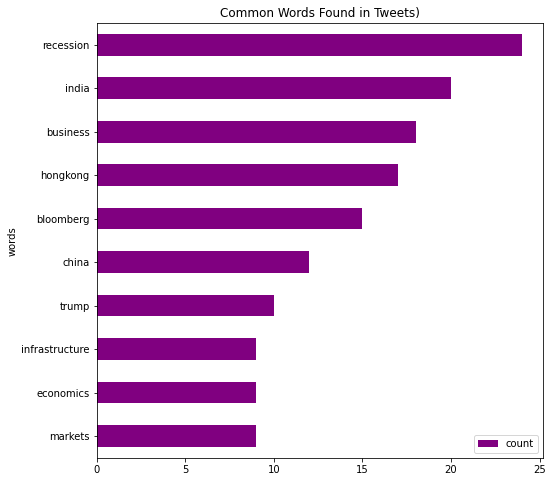

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets)")

plt.show()

# End Of Practice project